# Домашнее задание 2

Это домашнее задание по материалам 3-5 недели семестра (3-5 лекции и 3-4 семинары). Дедлайн по отправке - 23:59 18 октября.

- Домашнее задание выполняется в этом же Jupyter Notebook'e.

- Файл необходимо переименовать: __Номер группы_Фамилия_Имя__ (без пробелов в начале и конце). Пример: __Б05-100_Иванов_Иван__.

- ДЗ нужно отправлять на __OptimizationHomework@yandex.ru__. Тема письма: __МФТИ_номер задания__ (без пробелов в начале и конце). Для данного ДЗ тема письма: __МФТИ_2__.

- Для решения можно использовать Google Colab, но присылать нужно не ссылку на Colab, а готовый notebook и все необходимые дополнительные файлы.

- Решение каждой задачи/пункта задачи поместите после условия.

- Не забывайте добавлять необходимые пояснения и комментарии.

- В финальной версии, которая будет отправлена на проверку, должны быть удалены все отладочные артефакты. Под таким артефактами подразумеваются любые выводы ячеек, которые никак не прокоментированы в тексте, а также любой массовый/длинный технический вывод (даже если он прокомментирован в тексте).

- При полном запуске решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок.

- Максимальный балл за задание 100.

- Часть задач помечена $\triangle$. Они также входят в максимальный балл за задание, а значит являются обязательными для получения максимальной оценки, но мы считаем, что достаточно выполнить задания без $\triangle$, чтобы вникнуть в основные вещи, происходящие в соотвествующей части задания.

Желаем успехов!

### Часть 1. Решаем задачу безусловной оптимизации

Рассмотрим задачу минимизации эмпирического риска (да-да, machine learning):
\begin{equation}
\min_{w \in \mathbb{R}^d} \frac{1}{n} \sum\limits_{i=1}^n \ell (g(w, x_i), y_i) + \frac{\lambda}{2} \| w \|^2_2,
\end{equation}
где $\ell$ - функция потерь, $g$ - модель, $w$ - параметры модели, $\{x_i, y_i\}_{i=1}^n$ - выборка данных из векторов признаков $x_i$ и меток $y_i$, $\lambda > 0$ - параметр регуляризации.

Используем линейную модель $g(w, x) = w^T x$ и логистическую/сигмоидную функцию потерь: $\ell(z,y) = \ln (1 + \exp(-yz))$ (__Важно: $y$ должен принимать значения $-1$ или $1$__). Полученная задача называется задачей логистической регрессии. 

__Задача 1. (всего 12 баллов)__ Проведем подготовительную работу. 

__а). (8 баллов)__ Выпишите градиент и гессиан для данной задачи. Является ли задача выпуклой? А $\mu$ - сильно выпуклой? Если да, то как можно оценить $\mu$? Оцените константу Липшица градиента $L$. 

Обозначим $\frac{1}{n} \sum\limits_{i=1}^n \ell (g(w, x_i), y_i) + \frac{\lambda}{2} \| w \|^2_2$ за $f(w)$.

Ввиду линейности градиента сначала посчитамем градиент от $\ell (g(w, x_i), y_i)$:
1. $\ell (g(w, x_i), y_i)  = \ln(1 + \exp(-y_i w^T x_i)).$
2. Зная првавила дифференцирования сложной функции получим, что $\nabla \ln(1 + \exp(-y_i w^T x_i)) = \frac{\exp(-y_i w^T x_i)(-y_i x_i)}{1 + \exp(-y_i w^T x_i)}.$
3. Тогда, учитывая сумму и параметр регуляризации получим, что $\nabla (\frac{1}{n} \sum\limits_{i=1}^n \ell (g(w, x_i), y_i) + \frac{\lambda}{2} \| w \|^2_2) = \frac{1}{n} \sum\limits_{i=1}^n \frac{\exp(-y_i w^T x_i)(-y_i x_i)}{1 + \exp(-y_i w^T x_i)} + \lambda w = \frac{1}{n} \sum\limits_{i=1}^n (\sigma(y_i w^T x_i) - 1)y_i x_i + \lambda w.$  

Теперь будем считать гессиан. Так же ввиду его линейности сначала поситамем гессиан от выражения под знаком суммы:
1. Найдем дифференциал: $d((\sigma(y_i w^T x_i) - 1)y_i x_i) = d\langle (\sigma(y_i w^T x_i) - 1)y_i x_i, dw_1 \rangle = \langle d(\sigma(y_i w^T x_i)y_i x_i), dw_1 \rangle = \langle y_i x_i d(\sigma(y_i w^T x_i)), dw_1 \rangle = \langle y_i \sigma(y_i^2 w^T x_i) (1 - \sigma(y_i w^T x_i)) x_i \langle x_i, dw\rangle, dw_1 \rangle = \langle \sigma(w^T x_i) (1 - \sigma(w^T x_i)) x_i x_i^T dw_1, dw \rangle$ (тут дополнительно использовали тот факт, что $y = \pm 1$).
2. Тогда из пункта 1, линейности и учитывая параметр регуляризации получим, что $\nabla^2 (\frac{1}{n} \sum\limits_{i=1}^n \ell (g(w, x_i), y_i) + \frac{\lambda}{2} \| w \|^2_2) = \frac{1}{n} \sum\limits_{i=1}^n \sigma(w^T x_i) (1 - \sigma(w^T x_i)) x_i x_i^T + \lambda I.$  

Оценим выпуклость:
1. Обозначим найденный гессиан за $H$ и рассмотрим вектор $z$ соответствующей размерности и произведение $z^T H z$:
$$z^T H z = z^T (\frac{1}{n} \sum\limits_{i=1}^n \sigma(w^T x_i) (1 - \sigma(w^T x_i)) x_i x_i^T + \lambda I) z = \frac{1}{n} \sum\limits_{i=1}^n \sigma(w^T x_i) (1 - \sigma(w^T x_i)) z^T x_i x_i^T z + z^T \lambda I z = \frac{1}{n} \sum\limits_{i=1}^n \sigma(w^T x_i) (1 - \sigma(w^T x_i)) (z^T x_i)^2 + z^T \lambda I z \geq 0. $$
Последний переход справелив в силу неотрицательности всех коэффициентов под знаком суммы, положительной полуопределенности единичной матрицы, и того факта, что $\lambda > 0.$ То есть гессиан положительно полуопределен, а значит и задача минимизации выпукла.  

Теперь оценим сильную выпуклость:
1. Рассмотрим гессиан и сравним его с $\mu I$: 
$$\frac{1}{n} \sum\limits_{i=1}^n \sigma(w^T x_i) (1 - \sigma(w^T x_i)) x_i x_i^T + \lambda I - \mu I \succeq 0.$$
Так гессиан - симетрическая матрица, то это условие равносильно тому, что $\lambda_{min} + \lambda - \mu \geq 0$, где $\lambda_{min}$ - минимальное собственное значение матрицы $\frac{1}{n} \sum\limits_{i=1}^n \sigma(w^T x_i) (1 - \sigma(w^T x_i)) x_i x_i^T.$ Понятно, что в силу структуры данного гессиана, его собственые значения могут быть сколько угодно близкими к нулю. При этом, так как $\sigma(w^T x_i) (1 - \sigma(w^T x_i)) \geq 0$ а $xx^T$ - положительно полуопределенная матрица, то все собственные значения неотрицаnельны, nо есть точная нижняя грань $\lambda_{min} = 0$. Таким образом, функция $\mu$-сильно выпукла при $\mu \leq \lambda.$  


Проведем оценку константы Липшица:
1. Перед этим для произвольных оценим $a, b$ оценим $\sigma(a) - \sigma(b)$:
   1. По теореме Лагранжа о среднем $\sigma(a) - \sigma(b) = \sigma'(c) (b - a), c \in (a, b).$
   2. Оценим $\sigma'(c)$, для этого найдем вторую производную:  
      $$\sigma''(c) = \sigma(c) (1 - \sigma(c)) (1 - 2\sigma(c)).$$ 
      Тогда $\sigma'(c) \leq \frac{1}{4}.$
   3. Из предыдущих двух пукнтов можно получить, что $\sigma(a) - \sigma(b) \leq \frac{1}{4} (b - a).$
2. Теперь рассмотрим $\| \nabla f(x) - \nabla f(y) \|_2$:  
   $ \| \nabla f(w) - \nabla f(v) \|_2 = \| \frac{1}{n} \sum\limits_{i=1}^n (\sigma(y_i w^T x_i) - \sigma(y_i v^T x_i))y_i x_i + \lambda (w - v) \|_2 \leq \| \frac{1}{n} \sum\limits_{i=1}^n (\sigma(y_i w^T x_i) - \sigma(y_i v^T x_i)) \|_2 |y_i| \| x_i \|_2 + \| \lambda (w - v) \|_2 \leq (\frac{1}{4n} \sum\limits_{i=1}^n |y_i|^2 \| x_i \|_2^2 + \lambda) \| w - v \|_2  = \frac{1}{4n} (\sum\limits_{i=1}^n \| x_i \|_2^2 + \lambda) \| w - v \|_2 = \frac{1}{4n} (\| X \|_F^2 + \lambda )\| w - v \|_2.$
Здесь пользовались пунктом 1 и тем фактом, что $y = \pm 1$.
1. Тогда по определению получили, что $f$ это $L$-гладкая функция с коэффициентом $L = \frac{1}{4n} \| X \|_F^2 + \lambda$

К заданию приложен датасет _mushrooms_. С помощью следующего кода сформируйте матрицу $X$ и вектор $y$, в которой и будет храниться выборка $\{x_i, y_i\}_{i=1}^n$:

In [2]:
dataset = "mushrooms.txt"
#файл должен лежать в той же директории, что и notebook

In [855]:
from sklearn.datasets import load_svmlight_file
data = load_svmlight_file(dataset)
X, y = data[0].toarray(), data[1]

Поменяем вектор $y$, чтобы $y_i$ принимали значения $-1$ и $1$. Вы также можете сделать дополнительную предобработку данных (приемами из машинного обучения), но это никак дополнительно не оценивается.

In [856]:
y = 2 * y - 3

Разделим данные на две части: обучающую и тестовую.

In [857]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

__в). (3 балла)__ Для обучающей части $X_{train}$, $y_{train}$ оцените константу $L$. Задайте $\lambda$ так, чтобы $\lambda \approx L / 1000$.  Реализуйте в коде подсчет значения, градиента и гессиана для нашей целевой функции ($X$, $y$, $\lambda$ лучше подавать в качестве параметра, чтобы была возможность их менять, а не только подставлять фиксированные $X_{train}$, $y_{train}$). Можно использовать как библиотеку ``numpy``, так и библиотеки ``autograd``, ``pytorch``, ``jax``.

In [858]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid', font_scale=1.1, palette='Set1')
%matplotlib inline

In [859]:
X_train = torch.from_numpy(X_train)
y_train = torch.from_numpy(y_train)

In [860]:
features_amount = X_train.shape[1]
sample_size = X_train.shape[0]
L = (1000 / 999) * (1 / (4 * sample_size)) * torch.square(torch.linalg.norm(X_train)) 
lambd = L / 1000
mu = lambd

In [861]:
def f(w, X=X_train, y=y_train, lambd=lambd):
    return torch.mean(torch.log(1 + torch.exp(-y * (X @ w)))) + 0.5 * lambd * torch.square(torch.norm(w))

def grad_f(w, X=X_train, y=y_train, lambd=lambd):
    return torch.func.grad(f, argnums=0)(w, X, y, lambd).data

def hessian_f(w, X=X_train, y=y_train, lambd=lambd):
    return torch.func.hessian(f, argnums=0)(w, X, y, lambd).data

def momentum_0(k):
    return 0

def momentum_1(i):
    return torch.linspace(-1, 1, 5)[i]

def momentum_2(k):
    return k / (k + 3)

def momentum_3(k):
    return k / (k + 2)

def momentum_4(k):
    return k / (k + 1)

def momentum_5(k):
    return (torch.sqrt(L) - torch.sqrt(mu)) / ((torch.sqrt(L)) + torch.sqrt(mu))

__Задача 2. (всего 12 баллов)__ Данная часть задания связана с моментумом и ускорением.

__а). (3 балла)__ Реализуйте метод тяжелого шарика и ускоренный градиентный метод Нестерова. 

На всякий случай мы приводим здесь вариант описания функции для градиентного спуска из первого задания. Можно пользоваться таким форматом по желанию. Учтите, что в коде встречается ``x_sol`` - это проблему стоит как-то обойти или не использовать критерии, завязанные на ``x_sol``.

In [862]:
def gradient_descent(f, nabla_f, x_0, x_sol, gamma_k,
                     K = 10**3, eps = 10**-5, mode = 'x_k - x^*'):
    '''
        f - целевая функция
        nabla_f - градиент целевой функции
        x_0 - стартовая точка
        x_sol - точное решение (оно нужно для подсчета ошибки)
        gamma_k - функция для вычисления шага метода
        K - количество итераций (по умолчанию 1е3)
        eps - желаемая точность (по умолчанию 1е-5)
        mode - критерий сходимости 
               Значения либо 'x_k - x^*' - тогда критерий сходимости будет ||x_k - x^*||,
               либо 'f(x_k) - f(x^*)' - тогда критерий сходимости будет f(x_k) - f(x^*),
               либо 'x_k+1 - x_k', либо 'f(x_k+1) - f(x_k)' (критерии будут аналогичными)

        Функция возвращает точку, в которой достигается минимум и вектор ошибок
    '''
    return

In [863]:
def heavy_ball(grad, x_0, gamma_k, momentum_k, K, mode='grad(f(x_k))'):
    
    errors = []
    x_k = x_0.clone().detach()
    x_prev = x_0.clone().detach()

    for k in range(K):
        x_next = x_k - gamma_k * grad(x_k) + momentum_k(k) * (x_k - x_prev)
        errors.append(torch.norm(grad(x_next)) / torch.norm(grad(x_0)))
        x_prev = x_k.clone()
        x_k = x_next.clone().detach()

    return x_k, errors

In [864]:
def nesterov_accelerated(grad, x_0, gamma_k, momentum_k, K = 10**3, mode='grad(f(x_k))'):
    
    errors = []
    x_k = x_0.clone().detach()
    y_k = x_0.clone().detach()

    for k in range(K):
        x_next = y_k - gamma_k * grad(y_k)
        y_next = x_next + momentum_k(k) * (x_next - x_k)
        errors.append(torch.norm(grad(x_next)) / torch.norm(grad(x_0)))
        x_k = x_next.clone().detach()
        y_k = y_next.clone().detach()

    return x_k, errors

__б). (7 баллов)__ Решите задачу оптимизации на тестовой выборке с помощью двух реализованных методов. Зафиксируйте шаг $\frac{1}{L}$ и перебирайте разные значения моментума от -1 до 1. Проверьте также значения моментума равные $\frac{k}{k+3}$, $\frac{k}{k+2}$, $\frac{k}{k+1}$ ($k$ - номер итерации), а если целевая функция является  сильно выпуклой, то и $\frac{\sqrt{L} - \sqrt{\mu}}{\sqrt{L} + \sqrt{\mu}}$. Стартовую точку и критерий сходимости можете выбрать на свой вкус, мы советуем использовать нормированную версию критерия, например, $\frac{\| \nabla f(x^k) \|}{\| \nabla f(x^0) \|}$, а также использовать в Задачах 3-4 ту же самую стартовую точку и тот же самый критерий сходимости.

В данном пункте нужно построить три графика: 1) значения критерия сходимости от номера итерации для метода тяжелого шарика с различными значениями моментума, 2) значения критерия сходимости от номера итерации для ускоренного градиентного метода с различными значениями моментума, 3) значения критерия сходимости от номера итерации для двух методов с наилучшим выбором моментума для каждого, а также градиентного спуска.

Не забывайте делать выводы и комментировать результаты. Например, отразите всегда ли сходимость является монотонной?

In [865]:
def execute_for_different_momentums(method, grad, x_0, gamma_k, K, mode='grad(f(x_k))'):

    momentums = [momentum_0, momentum_2, momentum_3, momentum_4, momentum_5]

    results = {}
    
    for momentum in momentums:
        x_k, errors = method(grad, x_0, gamma_k, momentum, K, mode)
        results[momentum.__name__] = {"final_x": x_k, "errors": errors}

    for i in range(5):
        x_k, errors = heavy_ball(grad, x_0, gamma_k, lambda k: momentum_1(i), K, mode)
        results[f"momentum_1_{i}"] = {"final_x": x_k, "errors": errors}
    
    return results

In [866]:
results_heavy_ball = execute_for_different_momentums(method=heavy_ball, grad=grad_f, x_0=torch.ones(features_amount, dtype=float), gamma_k=1/L, K=10**3, mode='grad(f(x_k))')
results_nesterov_accelerated = execute_for_different_momentums(method=nesterov_accelerated, grad=grad_f, x_0=torch.ones(features_amount, dtype=float), gamma_k=1/L, K=10**3, mode='grad(f(x_k))')
results_grad_descent = heavy_ball(grad=grad_f, x_0=torch.ones(features_amount, dtype=float), gamma_k=1/L, momentum_k=momentum_0, K=10**3, mode='grad(f(x_k))')

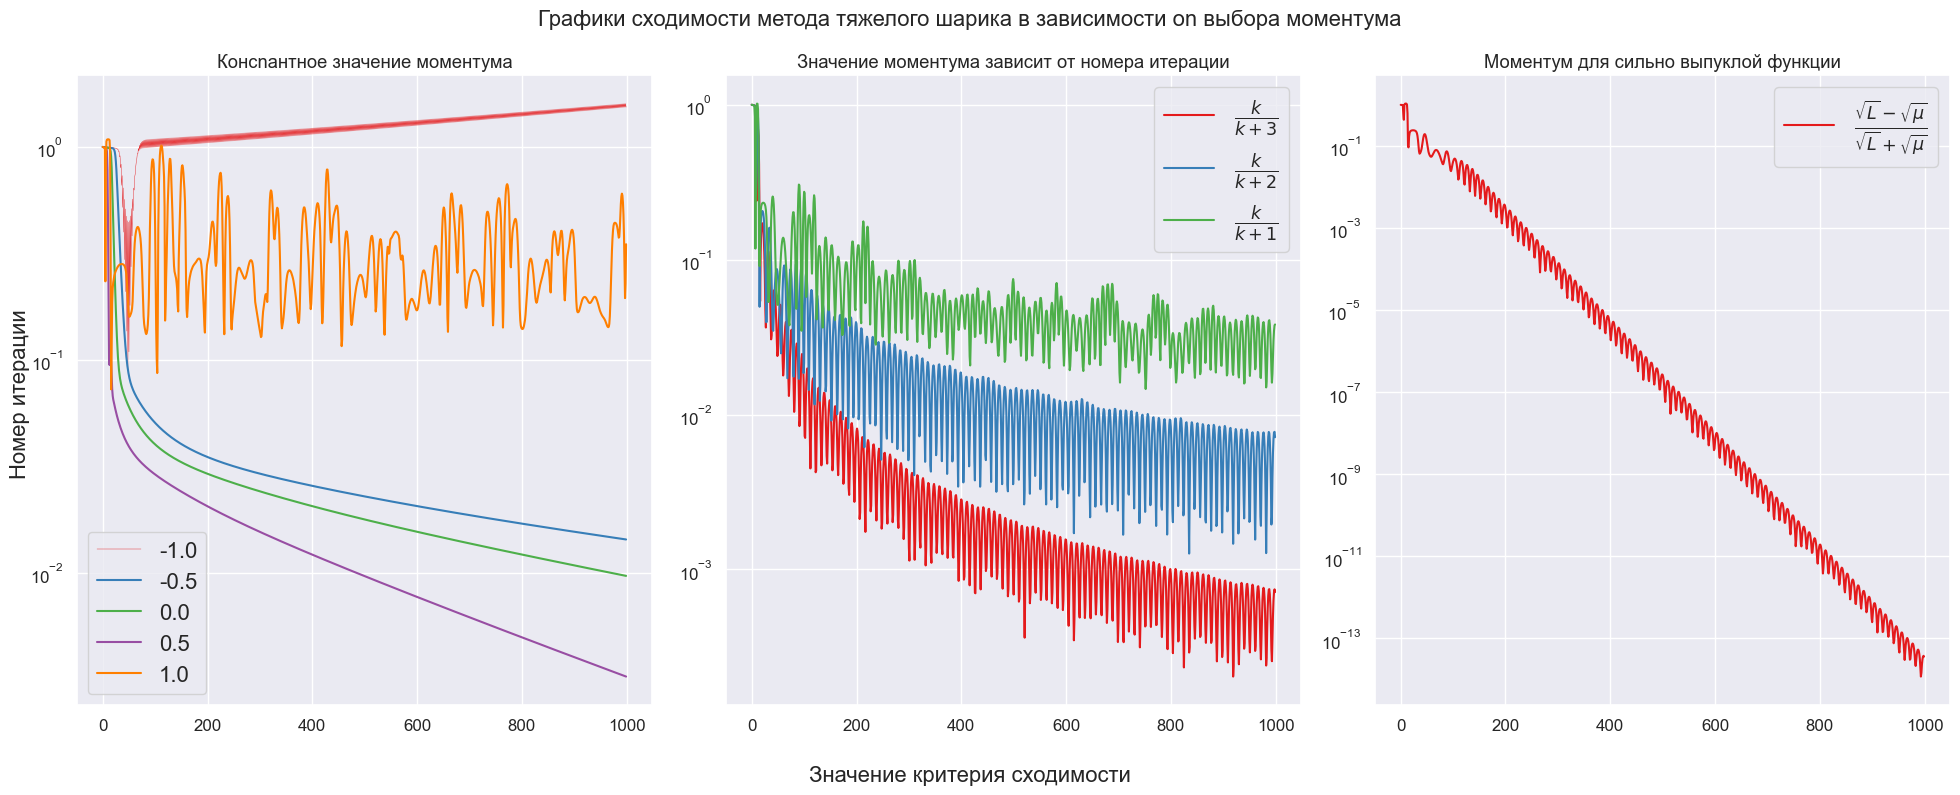

In [867]:
fig, axes = plt.subplots(1, 3, figsize=(20, 8))
plt.suptitle('Графики сходимости метода тяжелого шарика в зависимости оn выбора моментума')
fig.supxlabel('Значение критерия сходимости')
fig.supylabel('Номер итерации')


plt.subplot(1, 3, 1)
plt.plot(results_heavy_ball['momentum_1_0']['errors'], linewidth=0.3, label=f'{momentum_1(0)}')
plt.plot(results_heavy_ball['momentum_1_1']['errors'], label=f'{momentum_1(1)}')
plt.plot(results_heavy_ball['momentum_1_2']['errors'], label=f'{momentum_1(2)}')
plt.plot(results_heavy_ball['momentum_1_3']['errors'], label=f'{momentum_1(3)}')
plt.plot(results_heavy_ball['momentum_1_4']['errors'], label=f'{momentum_1(4)}')
plt.title('Консnантное значение моментума')
plt.yscale('log')
plt.legend(fontsize=16)


plt.subplot(1, 3, 2)
plt.plot(results_heavy_ball['momentum_2']['errors'], label='$\\frac{k}{k + 3}$')
plt.plot(results_heavy_ball['momentum_3']['errors'], label='$\\frac{k}{k + 2}$')
plt.plot(results_heavy_ball['momentum_4']['errors'], label='$\\frac{k}{k + 1}$')
plt.yscale('log')
plt.title('Значение моментума зависит от номера итерации')
plt.legend(fontsize=18)


plt.subplot(1, 3, 3)
plt.plot(results_heavy_ball['momentum_5']['errors'], label='$\\frac{\sqrt{L} - \sqrt{\mu}}{\sqrt{L} + \sqrt{\mu}}$')
plt.yscale('log')
plt.title('Моментум для сильно выпуклой функции')
plt.legend(fontsize=18)

plt.tight_layout()
plt.show()

Опишем графики для разных способов выбора моментума:  
1. Из константных моментумов самую лучшую сходимость показывает моментум со значением равным $0.5$. Так же относительно хорошую сходимость провяляют моментумы со значениями равными $0$ (по сути, обычный градменnный спуск) и $-0.5$. При этих трех моментумах сходимость монотонная. При значении равном $1$ наблюдается очень медленная или отсутствие сходимости с большими скачками, при значении $-1$ скачки становятсяся огромными и так же очень медленная или отсутствующая сходимость.
2. При зависимости моментума от номера сходимости самым лучшим значением оказалось $\frac{k}{k + 3}$, остальные выглядят так же за исключением сдвигов. При этом все графики сходятся одинаково: относительно быстро и со скачками.
3. График проявляет наилучшую по скорости сходимость по сравнению со всеми остальными, имеет не слишком сильно выраженные скачки и при этом сходится до $10^{-13}$, когда при предыдущих моментумах сходимость происходит nолько до $10^{-3}$ в лучшем случае. 

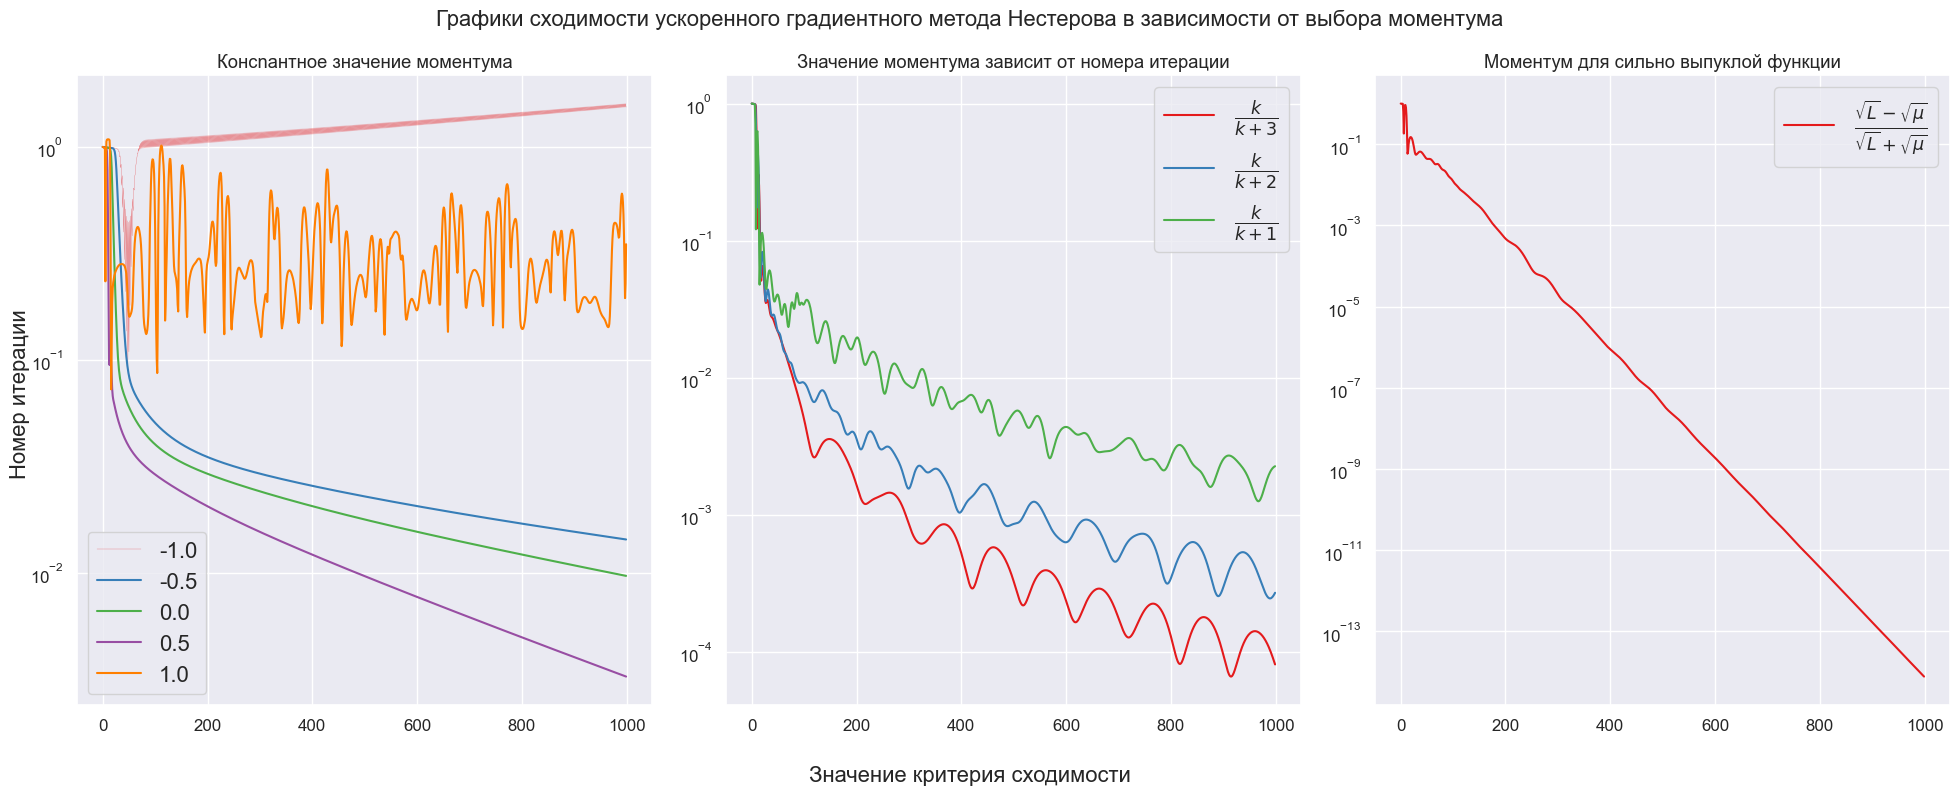

In [868]:
fig, axes = plt.subplots(1, 3, figsize=(20, 8))
plt.suptitle('Графики сходимости ускоренного градиентного метода Нестерова в зависимости от выбора моментума')
fig.supxlabel('Значение критерия сходимости')
fig.supylabel('Номер итерации')


plt.subplot(1, 3, 1)
plt.plot(results_nesterov_accelerated['momentum_1_0']['errors'], linewidth=0.15, label=f'{momentum_1(0)}')
plt.plot(results_nesterov_accelerated['momentum_1_1']['errors'], label=f'{momentum_1(1)}')
plt.plot(results_nesterov_accelerated['momentum_1_2']['errors'], label=f'{momentum_1(2)}')
plt.plot(results_nesterov_accelerated['momentum_1_3']['errors'], label=f'{momentum_1(3)}')
plt.plot(results_nesterov_accelerated['momentum_1_4']['errors'], label=f'{momentum_1(4)}')
plt.title('Консnантное значение моментума')
plt.yscale('log')
plt.legend(fontsize=16)


plt.subplot(1, 3, 2)
plt.plot(results_nesterov_accelerated['momentum_2']['errors'], label='$\\frac{k}{k + 3}$')
plt.plot(results_nesterov_accelerated['momentum_3']['errors'], label='$\\frac{k}{k + 2}$')
plt.plot(results_nesterov_accelerated['momentum_4']['errors'], label='$\\frac{k}{k + 1}$')
plt.yscale('log')
plt.title('Значение моментума зависит от номера итерации')
plt.legend(fontsize=18)


plt.subplot(1, 3, 3)
plt.plot(results_nesterov_accelerated['momentum_5']['errors'], label='$\\frac{\sqrt{L} - \sqrt{\mu}}{\sqrt{L} + \sqrt{\mu}}$')
plt.yscale('log')
plt.title('Моментум для сильно выпуклой функции')
plt.legend(fontsize=18)

plt.tight_layout()
plt.show()

Поведение графиков аналогично их поведению в методе тяжелого шарика, за исключением гораздо менее выраженных скачков и, возможно, более быстрой сходимости.

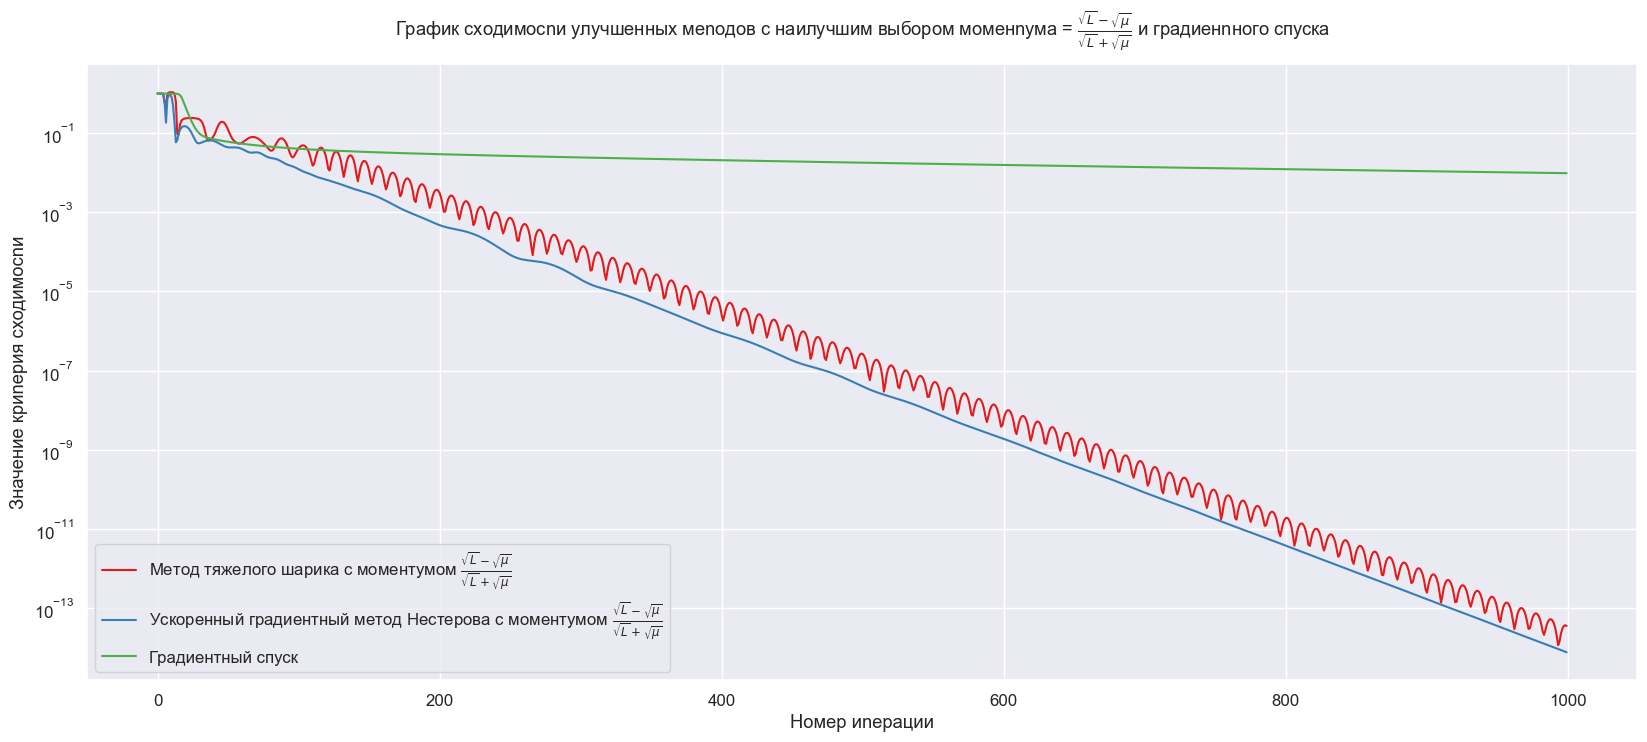

In [869]:
plt.figure(figsize=(20, 8))

plt.plot(results_heavy_ball['momentum_5']['errors'], label='Метод тяжелого шарика с моментумом $\\frac{\sqrt{L} - \sqrt{\mu}}{\sqrt{L} + \sqrt{\mu}}$')
plt.plot(results_nesterov_accelerated['momentum_5']['errors'], label='Ускоренный градиентный метод Нестерова с моментумом $\\frac{\sqrt{L} - \sqrt{\mu}}{\sqrt{L} + \sqrt{\mu}}$')
plt.plot(results_heavy_ball['momentum_0']['errors'], label='Градиентный спуск')
plt.yscale('log')
plt.title('График сходимосnи улучшенных меnодов с наилучшим выбором моменnума = $\\frac{\sqrt{L} - \sqrt{\mu}}{\sqrt{L} + \sqrt{\mu}}$ и градиенnного спуска', pad=20)
plt.xlabel('Номер иnерации')
plt.ylabel('Значение криnерия сходимосnи')
plt.legend()
plt.show()

Из представленных графиков можно сделать вывод, что ускоренный градиентный метод являеnся самым лучшим: сходится быстрее всего и с наименьшими колебаниями. Наихудшим, ожидаемо, является меnод градиентного спуска: хоть он сходится и мононотонно, но очень медленно и неточно.

__в). $\triangle$ (2 балла)__ В последние годы на практике (особенно в задачах машинного обучения) используется метод с "моментумом" в следующем виде:
\begin{align*}
    g^{-1} &= \nabla f(x^0)
    \\
    g^k &= \alpha_k g^{k-1} + \nabla f(x^k)
    \\
    x^{k+1} &= x^k - \gamma_k g^k
\end{align*}
Реализуйте метод с таким "моментумом". Попробуйте понять, как этот метод связан с методом тяжелого шарика и ускоренным градиентным методом. 

In [870]:
cache = {}

def contemporary_momentum(k, grad, x_k, alpha_k):
    
    if k in cache:
        return cache[k]

    if k == 0:
        momentum = grad(x_k)
    else:
        momentum = alpha_k * contemporary_momentum(k - 1, grad, x_k, alpha_k) + grad(x_k)
    
    cache[k] = momentum

    return momentum

def contemporary_method(grad, x_0, gamma_k, alpha_k, K, mode='grad(f(x_k))'):
    
    global cache
    cache = {}

    errors = []
    x_k = x_0.clone().detach()

    for k in range(K):
        x_next = x_k - gamma_k * gamma_k * contemporary_momentum(k, grad, x_k, alpha_k)
        errors.append(torch.norm(grad(x_next)) / torch.norm(grad(x_0)))
        x_k = x_next.clone().detach()

    return x_k, errors

In [871]:
def execute_for_different_alphas(grad, x_0, gamma_k, alphas, K, mode='grad(f(x_k))'):

    results = {}
    
    for alpha in alphas:
        x_k, errors = contemporary_method(grad, x_0, gamma_k, alpha, K, mode='grad(f(x_k))')
        results[str(alpha)] = {'x_k': x_k, 'errors': errors}
  
    return results

In [872]:
alphas = torch.linspace(-1, 1, 5)

results_contemporary_method = execute_for_different_alphas(grad=grad_f, x_0=torch.zeros(features_amount, dtype=torch.float64), gamma_k=1/L, alphas=alphas , K=10**4, mode='grad(f(x_k))')

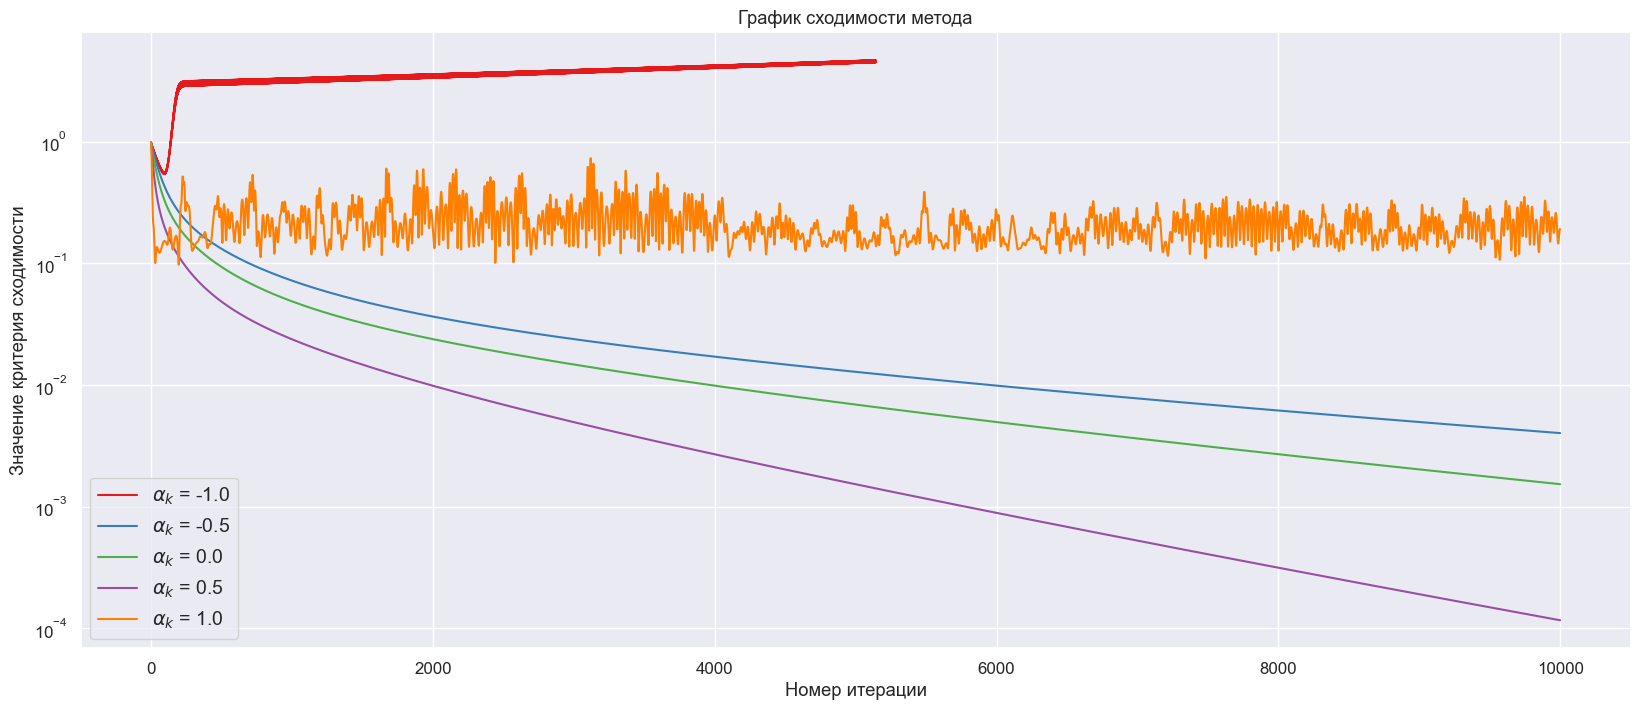

In [873]:
plt.figure(figsize = (20, 8))

for i, alpha in enumerate(alphas):
    plt.plot(results_contemporary_method[str(alpha)]['errors'], label=f'$\\alpha_k$ = {alpha}')
    plt.yscale('log')
    plt.xlabel('Номер итерации')
    plt.ylabel('Значение критерия сходимости')
    plt.title('График сходимости метода')
    plt.legend(fontsize=14)

plt.show()

Из графика видно, что метод ведет себя очень схожим образом с методом тяжелого шарика. По сути, это он и есть, просто в некотором роде моментумом тут будет являться градиент функции. Коэффициент $\alpha_k$ же будет определять, с какой силой градиент будет влиять на последующее значение функции. 

__Задача 3. (всего 20 баллов)__ В этой части будем работать с методом сопряженных градиентов. 

__а). (5 балла)__ Реализуйте метод Флетчера-Ривса и Полака-Рибьера. Опишите, как будете искать шага $\alpha_k$ (интересен как алгоритм, так и его инициализация). Добавьте в алгоритмы возможность делать "рестарты" (иногда брать $\beta_k = 0$) с некоторой частотой, которую можно настраивать.

$\alpha_k$ будем искать c помощью  метода Дихотомии (сравнением с методами золотого сечения, условиями Вольфе и Армихо было выяснено, что он самый оптимальный по соотношению точности и времени работы).

In [874]:
def dichotomy_search(function, x, p, a, b, eps):
    c = (a + b) / 2
    while (b - a) > eps:
        d = (a + c) / 2
        if function(x + d * p) <= function(x + c * p):
            b = c
            c = d
        else:
            e = (b + c) / 2
            if function(x + c * p) <= function(x + e * p):
                a = d
                b = e
            else:
                a = c
                c = e
    return c

In [875]:
def fletcher_reeves(function, grad, x_0, search_method, K, restart_frequency=0, mode='grad(f(x_k))'):

    errors = []
    x_k = x_0.clone().detach()
    p_k = -grad(x_k)
    
    for k in range(K):
        alpha_k = search_method(function, x_k, p_k, -1000, 1000, 0.001)
        x_next = x_k + alpha_k * p_k

        if restart_frequency != 0 and (k+1) % restart_frequency == 0:
            beta_k = 0
        else:
            beta_k = torch.dot(grad(x_next), grad(x_next)) / torch.dot(grad(x_k), grad(x_k))
    
        p_k = -grad(x_next) + beta_k * p_k
        errors.append(torch.norm(grad(x_next)) / torch.norm(grad(x_0)))
        x_k = x_next
    
    return x_k, errors

In [876]:
def polak_ribiere(function, grad, x_0, search_method, K, restart_frequency=0, mode='grad(f(x_k))'):

    errors = []
    x_k = x_0.clone().detach()
    p_k = -grad(x_k)
    
    for k in range(K):
        alpha_k = search_method(function, x_k, p_k, -1000, 1000, 0.001)
        x_next = x_k + alpha_k * p_k

        if restart_frequency != 0 and (k+1) % restart_frequency == 0:
            beta_k = 0
        else:
            beta_k = torch.dot(grad(x_next), grad(x_next) - grad(x_k)) / torch.dot(grad(x_k), grad(x_k))
    
        p_k = -grad(x_next) + beta_k * p_k
        errors.append(torch.norm(grad(x_next)) / torch.norm(grad(x_0)))
        x_k = x_next
    
    return x_k, errors

__б). (6 баллов)__ Решите задачу оптимизации двумя реализованными методами, варьируя для каждого частоту "рестартов": $1$ (каждую итерацию $\beta_k = 0$), $10$ (каждую десятую итерацию $\beta_k = 0$), $100$, $1000$, без рестартов.

Постройте три графика: 1) значения критерия сходимости от номера итерации для метода Флетчера-Ривса с различными частотами рестартов, 2) значения критерия сходимости от номера итерации для метода Полака-Рибьера с различными частотами рестартов, 3) значения критерия сходимости от номера итерации для обоих методов с наилучшим выбором частоты рестартов. Сделайте вывод.

In [877]:
def execute_for_different_restart_frequencies(method, function, grad, x_0, search_method, K, mode, restart_frequencies):

    results = {}
    
    for restart_frequency in restart_frequencies:
        x_k, errors = method(function, grad, x_0, search_method, K, restart_frequency, mode)
        results[str(restart_frequency)] = {'x_k': x_k, 'errors': errors}
  
    return results

In [878]:
restart_frequencies = [1, 10, 100, 1000, 0]

results_fletcher_reeves = execute_for_different_restart_frequencies(method=fletcher_reeves, function=f, grad=grad_f, x_0=torch.zeros(features_amount, dtype=torch.float64), search_method=dichotomy_search, K=10**3, mode='x_k+1 - x_k', restart_frequencies=restart_frequencies)
results_polak_ribiere = execute_for_different_restart_frequencies(method=polak_ribiere, function=f, grad=grad_f, x_0=torch.zeros(features_amount, dtype=torch.float64), search_method=dichotomy_search, K=10**3, mode='x_k+1 - x_k', restart_frequencies=restart_frequencies)

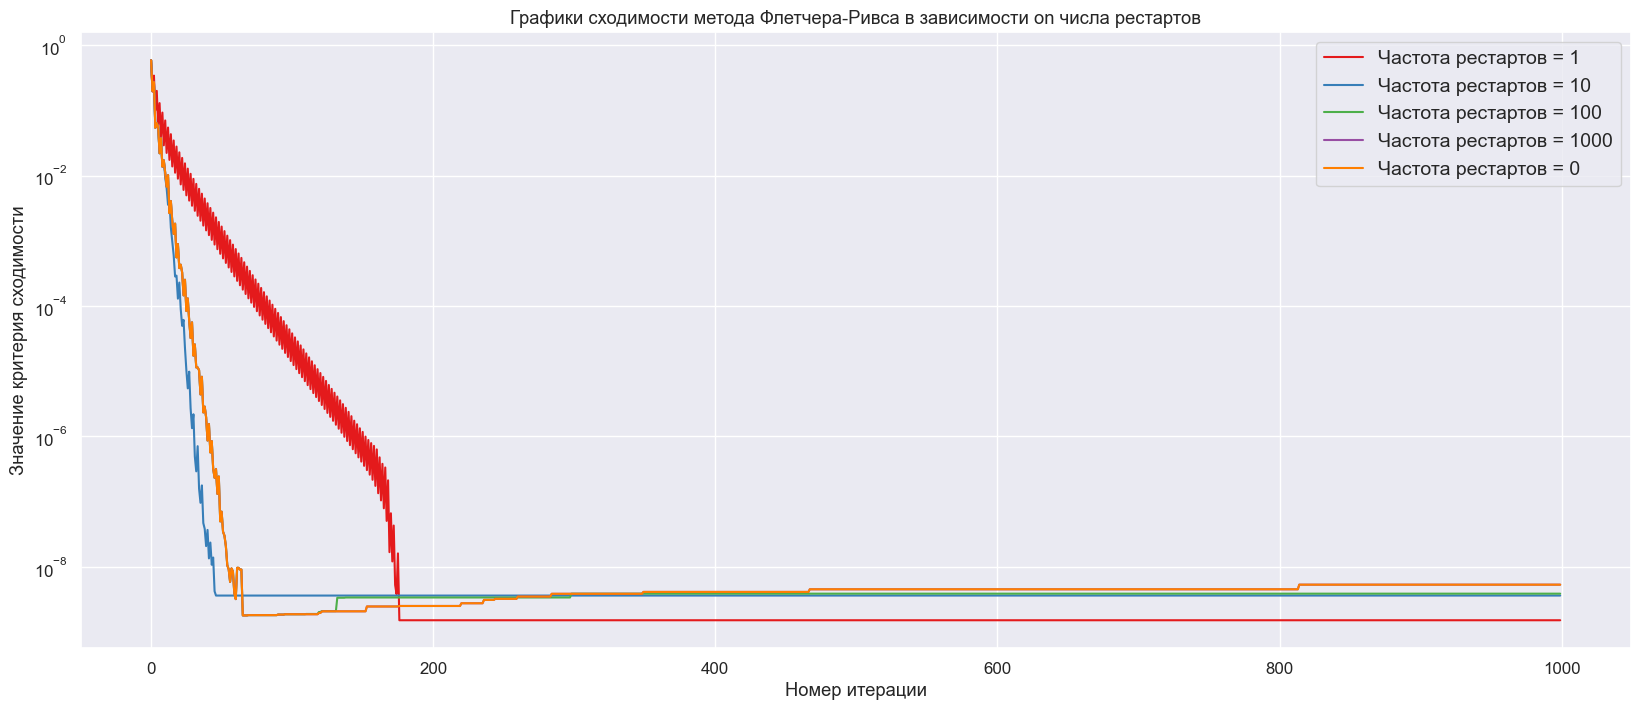

In [879]:
plt.figure(figsize=(20, 8))  

for i, restart_frequency in enumerate(restart_frequencies):
    plt.plot(results_fletcher_reeves[str(restart_frequency)]['errors'], label=f'Частота рестартов = {restart_frequency}')
    
plt.yscale('log')
plt.xlabel('Номер итерации')
plt.ylabel('Значение критерия сходимости')
plt.title('Графики сходимости метода Флетчера-Ривса в зависимости оn числа рестартов')
plt.legend(fontsize=14)

plt.show()

Все методы сходятся довольно быстро и с хорошей точностью, со небльшими скачками во время выполнения и с большими после рестартов. Однако, здесь можно оценить два параметра - скорость и точность сходимости: по первому параметру лучшим выбором для частоты рестартов является частота равная $10$, а по второму - $1$.

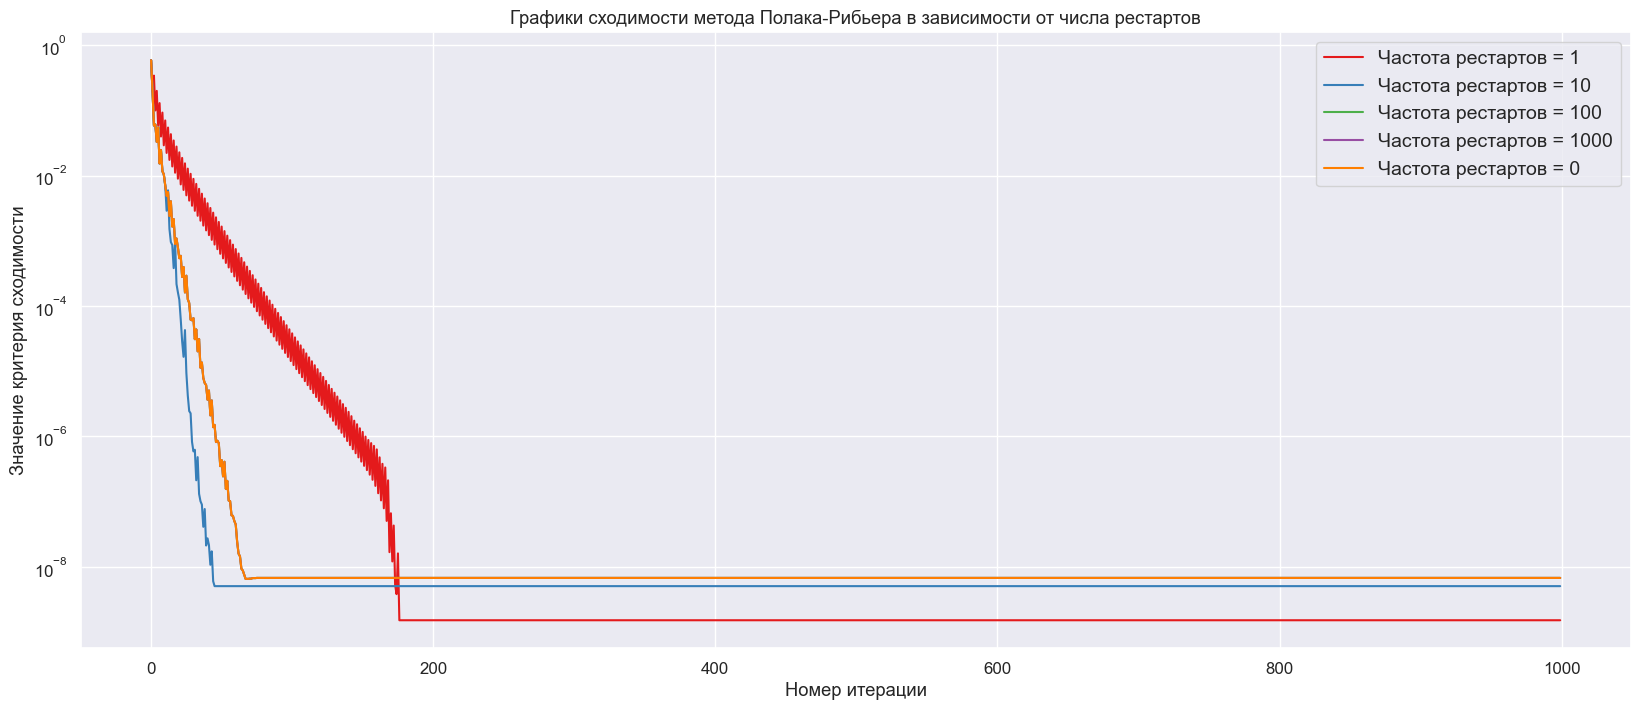

In [880]:
plt.figure(figsize=(20, 8))  

for i, restart_frequency in enumerate(restart_frequencies):
    plt.plot(results_polak_ribiere[str(restart_frequency)]['errors'], label=f'Частота рестартов = {restart_frequency}')
    
plt.yscale('log')
plt.xlabel('Номер итерации')
plt.ylabel('Значение критерия сходимости')
plt.title('Графики сходимости метода Полака-Рибьера в зависимости от числа рестартов')
plt.legend(fontsize=14)

plt.show()

Как и в случае метода Флетчера-Ривса оценим по скорости и точность сходимости: по первому параметру лучшим выбором для частоты рестартов является частота равная $10$ или $100$, а по второму - $1$.

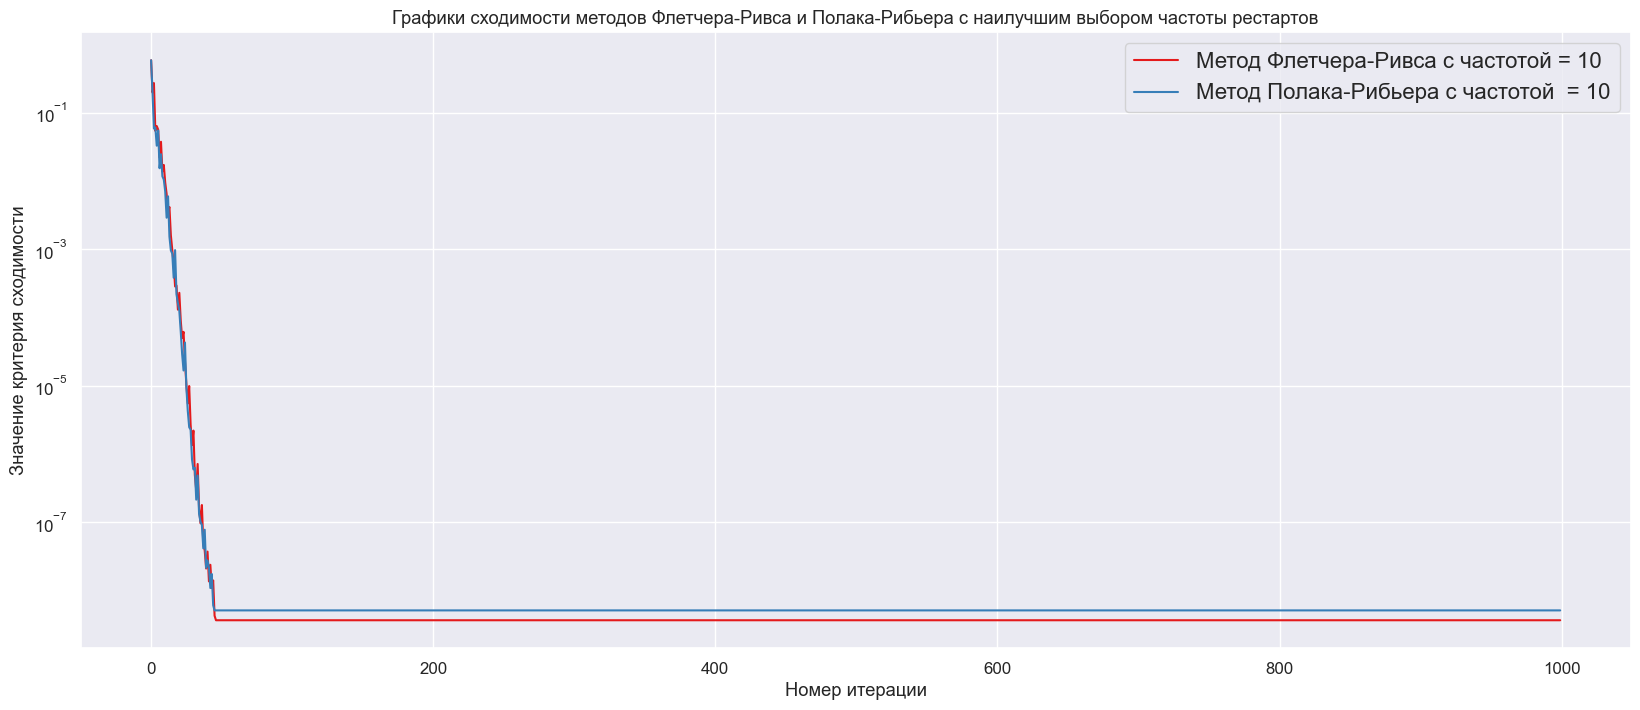

In [881]:
fletcher_reeves_best_frequency = 10
polak_ribiere_best_frequency = 10

plt.figure(figsize=(20, 8))  

plt.plot(results_fletcher_reeves[str(fletcher_reeves_best_frequency)]['errors'], label=f'Метод Флетчера-Ривса с частотой = {fletcher_reeves_best_frequency}')
plt.plot(results_polak_ribiere[str(polak_ribiere_best_frequency)]['errors'], label=f'Метод Полака-Рибьера с частотой  = {polak_ribiere_best_frequency}')
plt.yscale('log')
plt.xlabel('Номер итерации')
plt.ylabel('Значение критерия сходимости')
plt.title('Графики сходимости методов Флетчера-Ривса и Полака-Рибьера с наилучшим выбором частоты рестартов')
plt.legend(fontsize=16)

plt.show()     

Предположу, что при таких порядках можно сранивать два метода по скорости сходимости. Тогда видно, что они сходятся почти идентично по скорости, но метод Флетчера-Ривса все же сходится немного быстрее метода точнее.

__в). $\triangle$ (9 баллов)__ В этом пункте отвлечемся от задачи регресии. Поисследуем особенности метода сопряженных градиентов для квадратичной задачи
$$\min_{x \in \mathbb{R}^d} \left[\tfrac{1}{2} x^T A x - b x \right]$$
с положительно определенной симметричной матрицей $A \in \mathbb{R}^{d \times d}$ и некоторым вектором $b \in \mathbb{R}^d$. Нам нужно научиться генерировать матрицу $A$ с возможнностью задавать ее спектр (собственные значения). В прошлом задании уже просили сделать это. Мы советуем использовать следующий подход, основанный на разложении $A = Q D Q^T$, где матрица $D$ - диагональная, образованная из собственных значений, а $Q$ - ортогональная (ее можно сгенерировать с помощью $QR$-разложения случайной матрицы).

Пусть у нас имеется квадратичная задача, у которой матрица $A \in \mathbb{R}^{d \times d}$ имеет кластеризованные собственные значения, это означает, что существует некоторое число кластеров $k \leq d$ и значения $\tilde \lambda_1 < \ldots < \tilde \lambda_k$, что для любого $\lambda_i$ собственного значения матрицы $A$ существует $j \leq k$ такой, что $\lambda_i \in [(1 - p) \tilde \lambda_j; (1 + p) \tilde \lambda_j]$, где $p < 1$.

Далее нужно будет генерировать кластеризованные собственные значения, а потом и матрицу $A$. Старайтесь при генерации спектра удостоверится, что все значения в нем разные. В качесве критерия сходимости используйте $\frac{\| x^k - x^* \|^2_A} {\| x^0 - x^* \|^2_A}$, где $k$ - номер итерации, а $\| x \|^2_A = \langle x, Ax \rangle$. 

Протестируем работу метода сопряженных градиентов для различных вариантов кластеризации собственных значений:

1) Пусть $d = 100$, $k = 2$, $p = 0,05$, $\tilde \lambda_1 = 1$, в кластерах для $\tilde \lambda_1$ и $\tilde \lambda_2$ находится по 50 собственных значений. Варьируйте значение $\tilde \lambda_2$ от $10$ до $10^5$ (5 различных значений достаточно). На одном графике отобразите значения критерия сходимости от номера итерации для каждого значения $\tilde \lambda_2$. Сделайте вывод.

2) Пусть $d = 100$, $k = 2$, $p = 0,05$, $\tilde \lambda_1 = 1$, $\tilde \lambda_2 = 1000$. Варьируйте количество собственных значений в каждом из кластеров от $1$ до $99$ (5 различных значений достаточно). На одном графике отобразите значения критерия сходимости от номера итерации для каждого значения размера кластера для $\tilde \lambda_1$. Сделайте вывод.

3) Пусть $d = 100$, $p = 0,05$, $\tilde \lambda_1 = 1$, $\tilde \lambda_k = 1000$. Варьируйте количество кластеров $k$ от 2 до 100 (5 различных значений достаточно, включите 100 - соотвествует равномерному распределению собственных значений). На одном графике отобразите значения критерия сходимости от номера итерации для каждого значения  $k$. Сделайте вывод.

In [882]:
#ваше решение (Code и Markdown)

__Задача 4. (всего 17 баллов)__ Теперь поговорим про метод Ньютона и квазиньютоновские методы.

__а). (4 балла)__ Для задачи регресии реализуйте классический метод Ньютона и запустите его. Сходится ли он? Если нет, то попробуйте перед использованием метода Ньютона сначала запускать метод градиентного спуска на несколько итераций. Варьируйте количество шагов градиентного спуска. Постройте график значения критерия сходимости от номера итерации для комбинации градиентного спуска и метода Ньютона с различным числом шагов градиентного спуска. Сделайте вывод. 

In [883]:
def newton_method(grad, hessian, x_0, K, gradient_descent_steps, gamma_k, mode='grad(f(x_k))'):

    errors = []
    x_k = x_0.clone().detach()

    for _ in range(gradient_descent_steps):
        x_k = x_k - gamma_k * grad(x_k)
        errors.append(torch.norm(grad(x_k)) / torch.norm(grad(x_0)))

    for _ in range(K - gradient_descent_steps):
        x_k = x_k - torch.linalg.solve(hessian(x_k), grad(x_k))
        errors.append(torch.norm(grad(x_k)) / torch.norm(grad(x_0)))
    
    return x_k, errors

In [884]:
def execute_for_different_steps(grad, hessian, x_0, K, gradient_descent_steps_list, gamma_k, mode='grad(f(x_k))'):

    results = {}
    
    for gradient_descent_steps in gradient_descent_steps_list:
        x_k, errors = newton_method(grad, hessian, x_0, K, gradient_descent_steps, gamma_k, mode='grad(f(x_k))')
        results[str(gradient_descent_steps)] = {'x_k': x_k, 'errors': errors}
  
    return results

In [885]:
gradient_descent_steps_list = [0, 10, 15, 25, 50, 100]

results_newton_method = execute_for_different_steps(grad=grad_f, hessian=hessian_f, x_0=torch.ones(features_amount, dtype=torch.float64), K=10**3, gamma_k=1/L, gradient_descent_steps_list=gradient_descent_steps_list, mode='grad(f(x_k))')

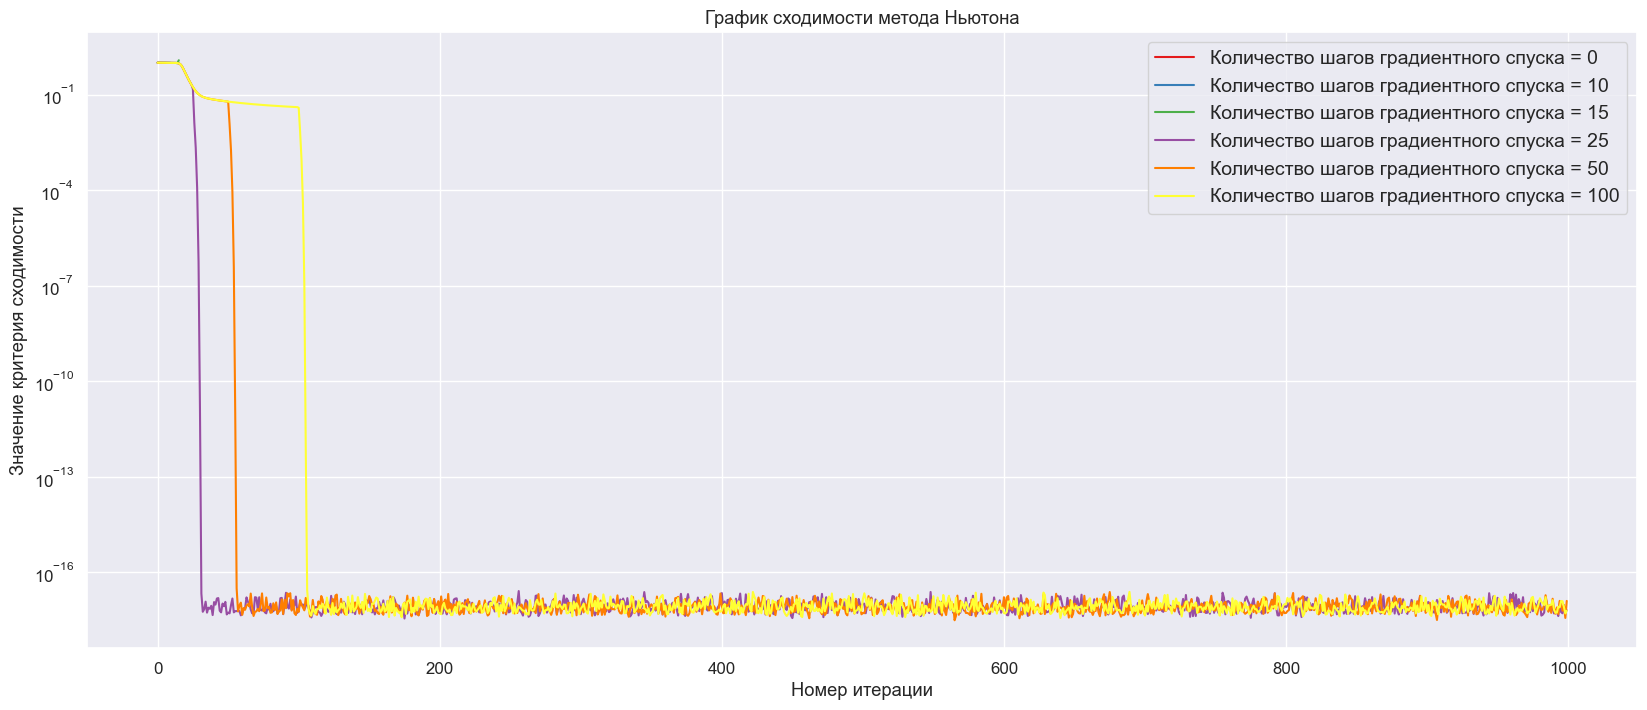

In [886]:
plt.figure(figsize = (20, 8))

for i, gradient_descent_steps in enumerate(gradient_descent_steps_list):
    plt.plot(results_newton_method[str(gradient_descent_steps)]['errors'], label=f'Количество шагов градиентного спуска = {gradient_descent_steps}')
    
plt.yscale('log')
plt.xlabel('Номер итерации')
plt.ylabel('Значение критерия сходимости')
plt.title('График сходимости метода Ньютона')
plt.legend(fontsize=14)

plt.show()

На графиках видно, что метод Ньютона действительно сходится за одну итерацию, дальше просто просто колеблясь. Самым оптимальным количеством вызовов градиентного спуска оказалось $25$. При этом видно, что графики выполнения метода с шагами градиентного спуска равными $0, 10, 15$ не отображаются - это происходит из-за того, что мы недостаточно приближаемся к окрестности решения, и при вычислении гессиана возникает Nan.

__б). (4 балла)__ Для данной задачи реализуйте квазиньютоновский метод L-BFGS (можно посмотреть оригинальную [статью](http://users.iems.northwestern.edu/~nocedal/PDFfiles/limited-memory.pdf)). Используйте его для решения задачи регресии. Добавьте его на график из предыдущего пункта. Сделайте вывод.

In [887]:
def bfgs_method(grad, x_0, K, gamma_k, mode='grad(f(x_k))'):
    
    I = torch.eye(features_amount, dtype=torch.float64)

    errors = []
    x_k = x_0.clone().detach()
    H_k = I

    for _ in range(K):

        x_next = x_k - gamma_k * (H_k @ grad(x_k))
        s_k = (x_next - x_k)
        y_k = grad(x_next) - grad(x_k)
        rho_k = 1 / (y_k.T @ s_k)
       
        s_k = s_k.view(-1, 1)
        y_k = y_k.view(-1, 1)

        H_k = (I - rho_k * (s_k @ y_k.T)) @ H_k @ (I - rho_k * (y_k @ s_k.T)) + rho_k * (s_k @ s_k.T)
        
        errors.append(torch.norm(grad(x_next)) / torch.norm(grad(x_0)))
        x_k = x_next

    return x_k, errors


In [888]:
def execute_for_different_gammas(grad, x_0, K, gammas, mode='grad(f(x_k))'):

    results = {}
    
    for gamma in gammas:
        x_k, errors = bfgs_method(grad, x_0, K, gamma, mode='grad(f(x_k))')
        results[str(gamma)] = {'x_k': x_k, 'errors': errors}
  
    return results

In [889]:
gammas = torch.linspace(-2, 2, 9)

results_bfgs_method = execute_for_different_gammas(grad=grad_f, x_0=torch.zeros(features_amount, dtype=torch.float64), K=10**3, gammas=gammas, mode='grad(f(x_k))')

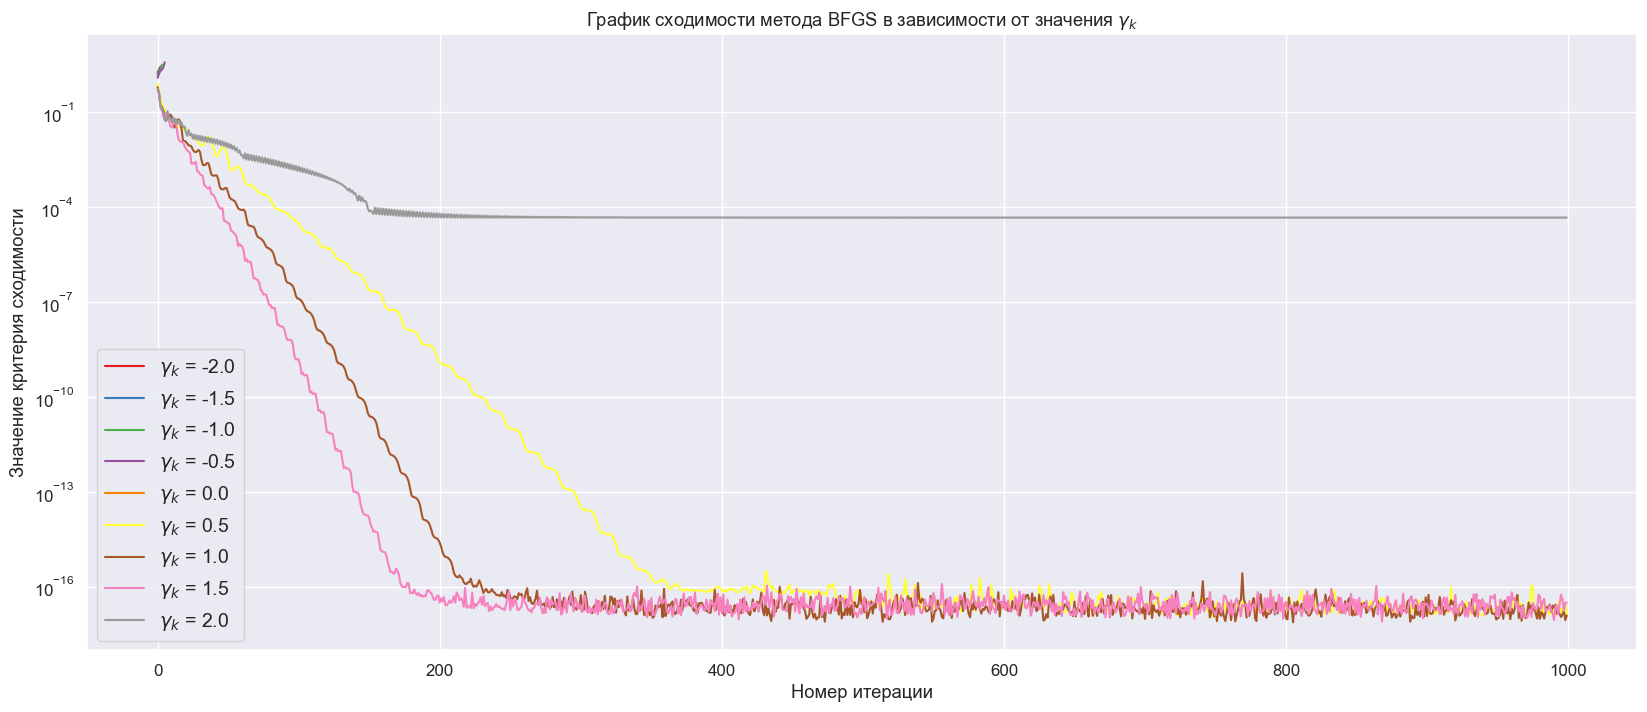

In [890]:
plt.figure(figsize = (20, 8))

for i, gamma in enumerate(gammas):
    plt.plot(results_bfgs_method[str(gamma)]['errors'], label=f'$\gamma_k$ = {gamma}')

plt.yscale('log')
plt.xlabel('Номер итерации')
plt.ylabel('Значение критерия сходимости')
plt.title('График сходимости метода BFGS в зависимости от значения $\gamma_k$')
plt.legend(fontsize=14)

plt.show()

Из графиков видно, что наилучшим значением $\gamma_k$ является $1.5$, поэтому именно его и будем сравнивать с методом Ньютона. Сами графики сходятся довольно быстро, и потом колеблются вокруг конечного значения. Некоторые значения графиков от $\gamma_k$ не отоброжаются из-за проблемности вычисления матриц с маленькими значениями.

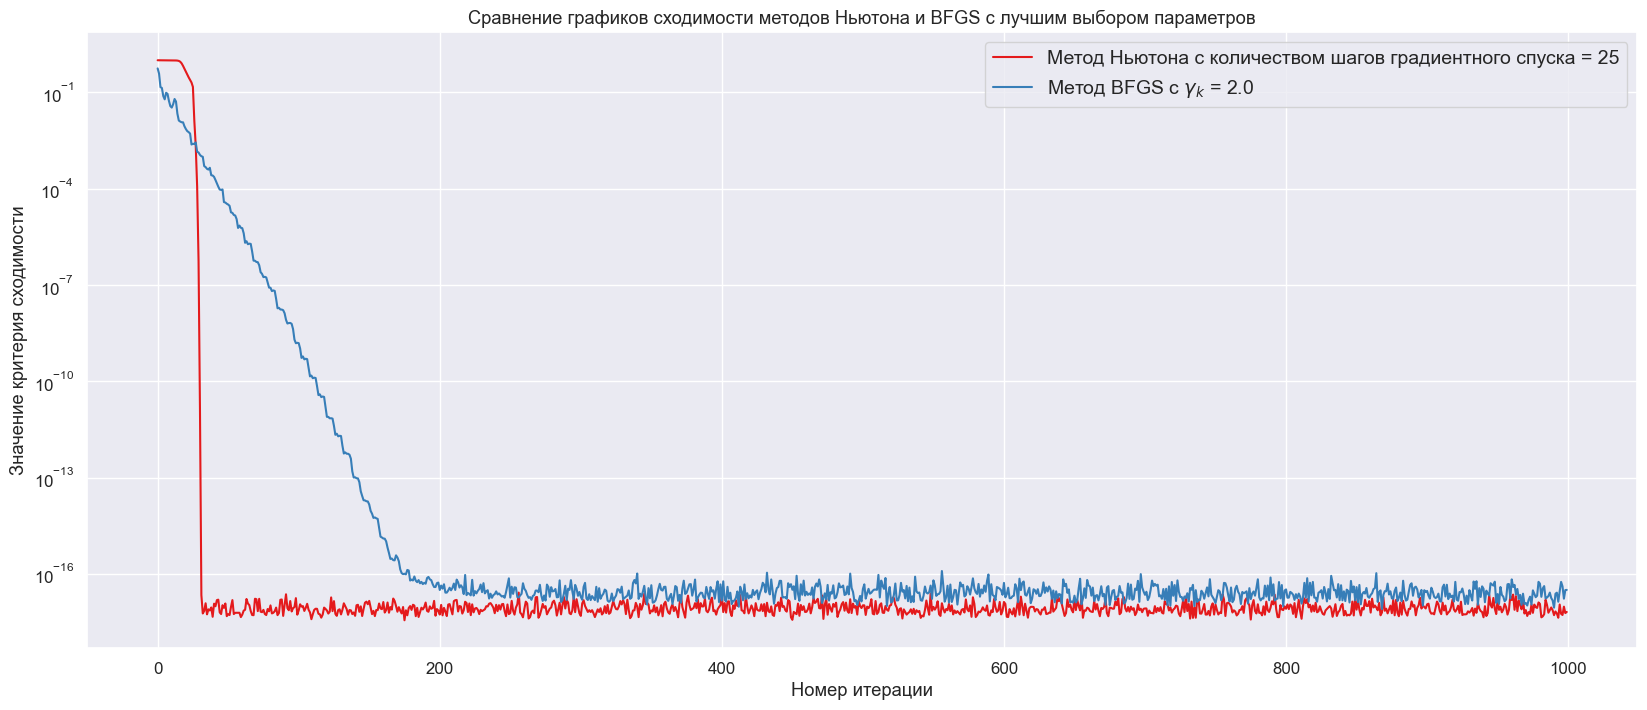

In [891]:
newton_best_gradient_descent_steps = 25
bfgs_best_gamma_k = gammas[7]

plt.figure(figsize = (20, 8))

plt.plot(results_newton_method[str(newton_best_gradient_descent_steps)]['errors'], label=f'Метод Ньютона с количеством шагов градиентного спуска = {newton_best_gradient_descent_steps}')
plt.plot(results_bfgs_method[str(bfgs_best_gamma_k)]['errors'], label=f'Метод BFGS с $\gamma_k$ = {gamma}')
plt.yscale('log')
plt.xlabel('Номер итерации')
plt.ylabel('Значение критерия сходимости')
plt.title('Сравнение графиков сходимости методов Ньютона и BFGS с лучшим выбором параметров')
plt.legend(fontsize=14)

plt.show()

Из графиков видно, что метод Ньютона сходится все же быстрее и точннее BFGS (хоть и немного). Но, в процессе написания и выполнения кода стало понятно, что считается метод Ньютона значительно дольше.

__в). $\triangle$ (9 баллов)__ Снова отвелчемся от регресии и рассмотрим одномерную задачу минимизации:
\begin{equation}
\min_{x \in \mathbb{R}} f(x) = x \arctan x - \frac{1}{2} \log (1 + x^2).
\end{equation}
Решим эту задачу с помощью классического метода Ньютона. Нарисуйте графики сходимости метода для двух разных точек старта $x^0 = 1.3$ и $x^0 = 1.5$. Сделайте вывод.

Чтобы добиться сходимости метода Ньютона необязательно прибегать к использованию другого метода в качестве стартового. Реализуйте две модификации метода Ньютона: демпфированный (добавление шага) и кубический метод Ньютона (смотрите [статью](https://link.springer.com/article/10.1007/s10107-006-0706-8)). Решают ли эти методы проблему сходимости метода Ньютона для стартовой точки $x^0 = 1.5$? В демпфированном методе попробуйте брать шаг от $0,5$ до $1$. Постройте графики сходимости. Сделайте вывод.

In [892]:
#ваше решение (Code и Markdown)

__Задача 5. $\triangle$ (всего 5 баллов)__ Осталось объеденить результаты полученные в Задачах 1-4. Для этого вспомним, что исходная задача регрессии является задачой машинного обучения и с помощью линейной модели $g$ можно предсказывать значения меток $y$. Как использовать итоговую модель для предсказания? Ответив на вопрос, сделайте предсказания на тестовой выборке $X_{test}$. Сравните с реальными метками $y_{test}$. Количество правильно угаданных меток есть точность/accuracy модели. Сравните метод градиентного спуска, метод тяжелого шарика, ускоренный градиентный метод, метод Флетчера-Ривса, метод Полака-Рибьера, метод Ньютона, L-BFGS. Постройте два графика: значение критерия сходимости от времени работы и точность предсказания от времени работы. Сделайте вывод.

In [893]:
#ваше решение (Code и Markdown)

### Часть 2. Выпуклость

__Задача 1. (4 балла)__ Пусть $ S \subseteq \mathbb{R}^d$ и пусть $\|\cdot\|$ - норма на $\mathbb{R}^d$.

__а). (2 балла)__ Для $a \geq 0$ определим множество $S_a$ как:
$$ S_a = \{x \mid \text{dist}(x, S) \leq a \},$$
где 
$$\text{dist}(x, S) = \inf_{y \in S} \| x - y \|.$$
Множество $S_a$ называется расширенным на $a$ относительно $S$. Докажите, что если $S$ выпукло, то $S_a$ также выпукло.

Будем доказывать выпуклость по определению.
1. Расмотрим $x, y \in S_a$ и $\forall \theta \in [0, 1]$.
2. Оценим $\inf_{z \in S}\| \theta x + (1 - \theta) y - z\|$: $$\inf_{z \in S}\| \theta x + (1 - \theta) y - z\| = \inf_{z_1, z_2 \in S}\| \theta x + (1 - \theta) y - (\theta z_1 + (1 - \theta) z_2) \| \leq \theta \inf_{z_1\in S}\| x - z_1 \| +  (1 - \theta) \inf_{z_2 \in S}\| y - z_2 \| \leq \theta a + (1-\theta) a = a.$$ $z$ можно разложить на выпуклую комбинацию $z_1, z_2$ как раз таки из-за выпуклости $S$, а последнее неравенство справедливо в силу того, что $x, y \in S_a$.
3. Таким образом, доказали, что $\text{dist}(\theta x + (1 - \theta) y, S) \leq a \Rightarrow \theta x + (1 - \theta) y \in S_a$, то есть множесто $S_a$ выпукло по определению.

__б). (2 балла)__ Для $a \geq 0$ определим множество $S_{-a}$ как:
$$ S_{-a} = \{x \mid B(x, a) \subset S\}, $$
где $B(x, a)$ - открытый шар (в норме $\| \cdot \|$) с центром в $x$ и радиусом $a$. Множество $S_{-a}$ называется суженным на $a$ относительно $S$. Докажите, что если $S$ выпукло, то $S_{-a}$ также выпукло.

Так же будем доказывать выпуклость по определению.
1. Расмотрим $x, y \in S_{-a}$ и $\forall \theta \in [0, 1]$.
2. Обозначим $\theta x + (1 - \theta) y$ за w и предположим, что $B(\theta x + (1 - \theta) y, a) \not\subset S$, то есть $\exist z \in B(\theta x + (1 - \theta) y, a): z \not\in S$.
3. Любую точку отрезка $[\theta x + (1 - \theta) y, z]$ можно выразить как $w = \gamma(\theta x + (1 - \theta) y) + (1 - \gamma) z, \gamma \in [0, 1]$. Понятно, что $w \in B(\theta x + (1 - \theta) y, a)$ (так как открытый шар - выпуклое множество). Тогда в силу выпуклости $S \hookrightarrow w \in S, \forall \gamma \in [0, 1]$. Но при $\gamma  = 1$, получим, что $z \in S$ - противоречие, значит множесвто $S_{-a}$ выпукло по определению.

Так же будем доказывать выпуклость по определению.
1. Расмотрим $x, y \in S_{-a}$ и $\forall \theta \in [0, 1]$.
2. Обозначим $\theta x + (1 - \theta) y$ за $w$ и рассмотрим $z \in B(w, a)$: $$\text{dist}(w, z) = \text{dist}(x, x + z - w) = \text{dist}(y, y + z - w) < a.$$
3. Так как  шары с центрами $x, y$ лежат внутри $S$, то $x + z - w, y + z - w \in S$. Из этого в силу выпуклости $S \hookrightarrow \theta (x + z - w) + (1 - \theta ) (x + z - w) \in S$.
4. В свою очередь $\theta (x + z - w) + (1 - \theta ) (x + z - w) = \theta x + (1 - \theta) y + z - w = z$. Из этого факта и предыдущего пункта следует, что $S$ - выпуклое.

__Задача 2. (3 балла)__ Пусть дана функция $f: \mathbb{R}^d \to \mathbb{R}$. Выясните является ли функция выпуклой/$\mu$-сильно выпуклой, если $f(x) = \sum\limits_{i=1}^{d} x_i^4$. В случае $\mu$-сильной выпуклости нужно найти и $\mu$.

1. Найдем градиент и гессиан функции: $$\nabla f = 4 \sum\limits_{i=1}^{d} x_i^3.$$ $$\nabla^2 f = 12 \sum\limits_{i=1}^{d} x_i^2.$$
2. Из найденного видно, что $\nabla^2 f \succeq 0$, а значит функция выпукла.
3. Для сильной выпуклости необходимо выполнение условия $\nabla^2 f \succeq \mu I$. Но при $x_i = 0 \forall i \geq d$ оно не будет выполнено, а значит функция не является сильно выпуклой.

__Задача 3. (всего 4 балла)__ Пусть дана функция $f: \mathbb{S}^d \to \mathbb{R}$. Здесь $\mathbb{S}$ - симметричные матрицы. Выясните является ли функция выпуклой/вогнутой, если

__а). (2 балла)__ $f(X) = \lambda_{\max}(X)$

Для доказательства будем использовать тот факт, что $\lambda_{max}(X) \leq \mu \Leftrightarrow \mu I - X \succeq 0$
1. Понятно, что $f(X)I - X \succeq 0, f(Y)I - Y \succeq 0$, где $X, Y \in S^d$.
2. Рассомтрим $X, Y \in S^d$, $\theta \in [0, 1]$ и проведем оценку: $$\theta f(X)I - \theta X  + (1 - \theta) f(Y)I - (1 - \theta) Y  = (\theta f(X) + (1- \theta) f(Y))I - (\theta X + (1- \theta) Y) \succeq 0 \Rightarrow (\theta f(X) + (1- \theta) f(Y))I \succeq (\theta X + (1- \theta) Y).$$
3. Применив функцию $f$ к полученному неравенству получим: $$f((\theta f(X) + (1- \theta) f(Y))I) \geq f(\theta X + (1- \theta) Y).$$ $$(\theta f(X) + (1- \theta) f(Y))I \geq f(\theta X + (1- \theta) Y).$$ То есть получили, что функция выпукла по определениюю.

__б). (2 балла)__ $f(X) = \lambda_{\min}(X)$

1. Заметим, что $\lambda_{min}(X) = -\lambda_{max}(-X).$
2. Тогда из предыдущего номера $\lambda_{min}(X)$ - вогнутая функция.

__Задача 4. (3 балла)__ Выясните является ли функция $f: \mathbb{S}^d_{++} \to \mathbb{R}$ выпуклой/вогнутой, если $f(X) = \text{Tr}(X^{-1})$.

In [894]:
#ваше решение (Markdown)

__Задача 5. (3 балла)__ Пусть дано множество $X \subseteq \mathbb{R}^d$ и $x^0 \in X$. Докажите, что множество
$$K(X, x^0)=\left\{ y \in\mathbb{R}^d \mid y^T x^0 \geq y^T x \text{ for all } x \in X\right\}$$ 
является выпуклым конусом.

1. Сначала докажем, что данное множество является конусом:
   1. Рассмотрим $y \in K(X, x^0)$: $$y \in K(X, x^0) \Rightarrow y^T x^0 \geq y^T x \ \forall x \in X \Rightarrow \forall \theta \geq 0 \hookrightarrow  (\theta y)^T x^0 \geq (\theta y)^T x \Rightarrow \theta y \in K.$$ То есть доказали по определению что множество является конусом.
2. Теперь докажем, что множество является выпуклым: 
   1. Рассмотрим $y_1, y_2 \in K, \theta \in [0, 1]$ и проведем оценку: $(\theta y_1 + (1 - \theta) y_2)^T x_0 = \theta y_1^T x_0 + (1 - \theta) y_2^T x_0 \geq \theta y_1^T x + (1 - \theta) y_2^T x = (\theta y_1 + (1 - \theta) y_2)^T x$. То есть доказали, что $\theta y_1 + (1 - \theta) y_2 \in K$, а значит множество выпукло по определению.

__Задача 6. $\triangle$ (6 баллов)__ Воспользовавшись неравенством Йенсена для выпуклой на $\mathbb{R}_{++}$ функции $f(x) = -\ln{x}$, докажите неравенство Гёльдера: $$\sum\limits_{i=1}^d x_i y_i \le \left( \sum\limits_{i=1}^d \vert x_i\vert ^p\right)^{1/p} \left( \sum\limits_{i=1}^d \vert y_i\vert^q\right)^{1/q}$$ для $p >1, \;\; \dfrac{1}{p} + \dfrac{1}{q} = 1$. $\mathbb{R}_{++}$ - положительные действительные числа.

In [895]:
#ваше решение (Markdown)

__Задача 7. $\triangle$ (6 баллов)__ Назовем множество $X \subseteq \mathbb{R}^d$ "средневыпуклым", если для любых его элементов $x$ и $y$ их середина также принадлежит $X$, т.е. $\frac{x + y}{2} \in X$. Докажите, что для замкнутых множеств "средневыпуклость" равносильна выпуклости.

1. Предположим обратное: $X$ - замкнутое, средневыпуклое и при этом не выпуклое, то есть $\exist x, y \in X (x < y), \exist \theta \in [0, 1]: \theta x + (1 - \theta) y \not\in X$ - обозначим эту комбинацию за $w$.
2. Тогда так как $X$ - замкнутое, то $w \in \bar X$. Тогда $w$ находится в открытом интервале, имеющим пустое пересечение с $X$, но границы этого интервала лежат в границе $X$ - обозначим их за $a, b$. (выбрать такие точки можно в силу того, что $w$ - линейная комбинация элементов из $X$).
3. Из средневыпуклости следует, что $\frac{a + b}{2} \in X$. Но $X \cap (a, b) = \emptyset$, то есть получили противоречие, значит $X$ - выпуклое.

__Задача 8. $\triangle$ (6 баллов)__ Пусть $X = \{x_1, \ldots, x_{d+2}\}$ - множество из $d + 2$ точек в $\mathbb{R}^d$. Покажите, что $X$ можно разбить на два подмножества $S$ и $T = X \setminus S$ таким образом, что пересечение их выпуклых оболочек (смотри определение в Части 7 пособия) непусто.

1. Рассмотрим $X = \{x_1, \ldots, x_{d+2}\}$. Тогда $\exist \{a_1, \ldots, a_{d+2}\}: \sum\limits_{i=1}^d a_i x_i = 0, \sum\limits_{i=1}^d a_i = 0$. Будет нетривиальное решение, так как коэффициентов $d + 2$, а решений $d + 1$.
2. Теперь возьмем $I \subset X$ - множество из точек с множителями большими нуля, тогда $J = X \setminus I$ будет множеством точек с неположительными коэффициентами. 
3. Покажем, что $I, J$ - искомое разбиение:
   1. Их выпуклые оболочки пересекаются, так как а обоих содержится точка $\sum\limits_{x_i \in I} \frac {a_i}{A} x_i = \sum\limits_{x_j \in J} \frac {-a_j}{A} x_j, A = \sum\limits_{x_i \in I} a_i = - \sum\limits_{x_j \in J} a_j$ - это действительно так, потому что данные линейные комбинации должны равняться нулю, следовательно, суммы действительно будут равными. Этот факт показывает, что $I, J$ - действительно искомое разбиение.